In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("fivethirtyeight")

In [3]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price        Adj Close       Close        High         Low        Open  \
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD     BTC-USD   
Date                                                                     
2014-09-17  457.334015  457.334015  468.174011  452.421997  465.864014   
2014-09-18  424.440002  424.440002  456.859985  413.104004  456.859985   
2014-09-19  394.795990  394.795990  427.834991  384.532013  424.102997   
2014-09-20  408.903992  408.903992  423.295990  389.882996  394.673004   
2014-09-21  398.821014  398.821014  412.425995  393.181000  408.084991   

Price         Volume  
Ticker       BTC-USD  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100

In [5]:
stock_data.tail()

Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2024-11-18  90542.640625  90542.640625  92596.789062  89393.593750   
2024-11-19  92343.789062  92343.789062  94002.867188  90426.984375   
2024-11-20  94339.492188  94339.492188  94902.023438  91619.500000   
2024-11-21  98504.726562  98504.726562  99014.218750  94132.601562   
2024-11-22  99088.656250  99088.656250  99481.390625  97319.523438   

Price               Open        Volume  
Ticker           BTC-USD       BTC-USD  
Date                                    
2024-11-18  89843.718750   75535775084  
2024-11-19  90536.812500   74521048295  
2024-11-20  92341.890625   71730956426  
2024-11-21  94334.640625  106024505582  
2024-11-22  98453.703125   81809358848

In [6]:
stock_data.describe().T

count          mean           std           min  \
Price     Ticker                                                      
Adj Close BTC-USD  3720.0  1.876659e+04  2.073378e+04  1.781030e+02   
Close     BTC-USD  3720.0  1.876659e+04  2.073378e+04  1.781030e+02   
High      BTC-USD  3720.0  1.916731e+04  2.116425e+04  2.117310e+02   
Low       BTC-USD  3720.0  1.830003e+04  2.022415e+04  1.715100e+02   
Open      BTC-USD  3720.0  1.874125e+04  2.069584e+04  1.768970e+02   
Volume    BTC-USD  3720.0  1.809697e+10  1.969593e+10  5.914570e+06   

                            25%           50%           75%           max  
Price     Ticker                                                           
Adj Close BTC-USD  1.192555e+03  9.278388e+03  3.011876e+04  9.908866e+04  
Close     BTC-USD  1.192555e+03  9.278388e+03  3.011876e+04  9.908866e+04  
High      BTC-USD  1.213650e+03  9.435351e+03  3.056430e+04  9.948139e+04  
Low       BTC-USD  1.174682e+03  9.122939e+03  2.953491e+04  9.731952e+04  
Open      BTC-USD  1.188885e+03  9.275281e+03  3.010152e+04  9.845370e+04  
Volume    BTC-USD  3.501435e+08  1.441092e+10  2.910710e+10  3.509679e+11

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3720 entries, 2014-09-17 to 2024-11-22
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3720 non-null   float64
 1   (Close, BTC-USD)      3720 non-null   float64
 2   (High, BTC-USD)       3720 non-null   float64
 3   (Low, BTC-USD)        3720 non-null   float64
 4   (Open, BTC-USD)       3720 non-null   float64
 5   (Volume, BTC-USD)     3720 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.4 KB


In [8]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [9]:
#Close price data
closing_price = stock_data[['Close']]

In [10]:
closing_price

Price              Close
Ticker           BTC-USD
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2024-11-18  90542.640625
2024-11-19  92343.789062
2024-11-20  94339.492188
2024-11-21  98504.726562
2024-11-22  99088.656250

[3720 rows x 1 columns]

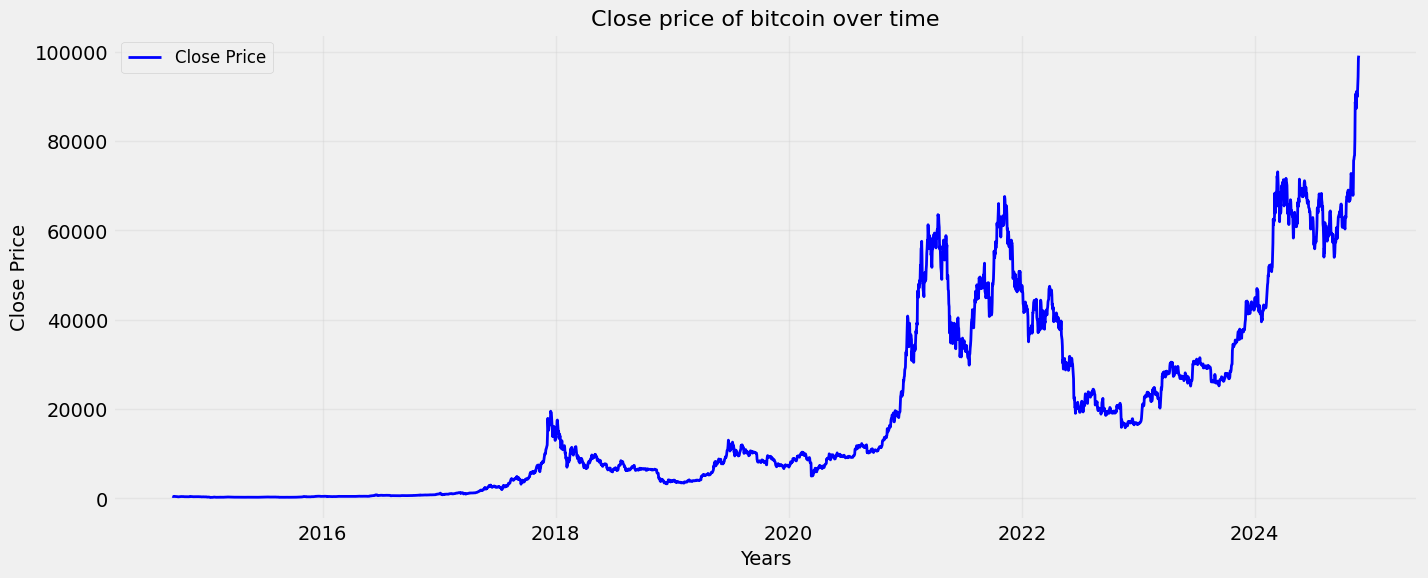

In [11]:
# Float closing price with enhancement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[0:5])/5)

30.0


In [13]:
df1 = pd.DataFrame(temp_data)

In [14]:
df1.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0
9  80.0

In [15]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [16]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 356).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_7688\1009629101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 356).mean()
C:\Users\KIIT01\AppData\Local\Temp\ipykernel_7688\1009629101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


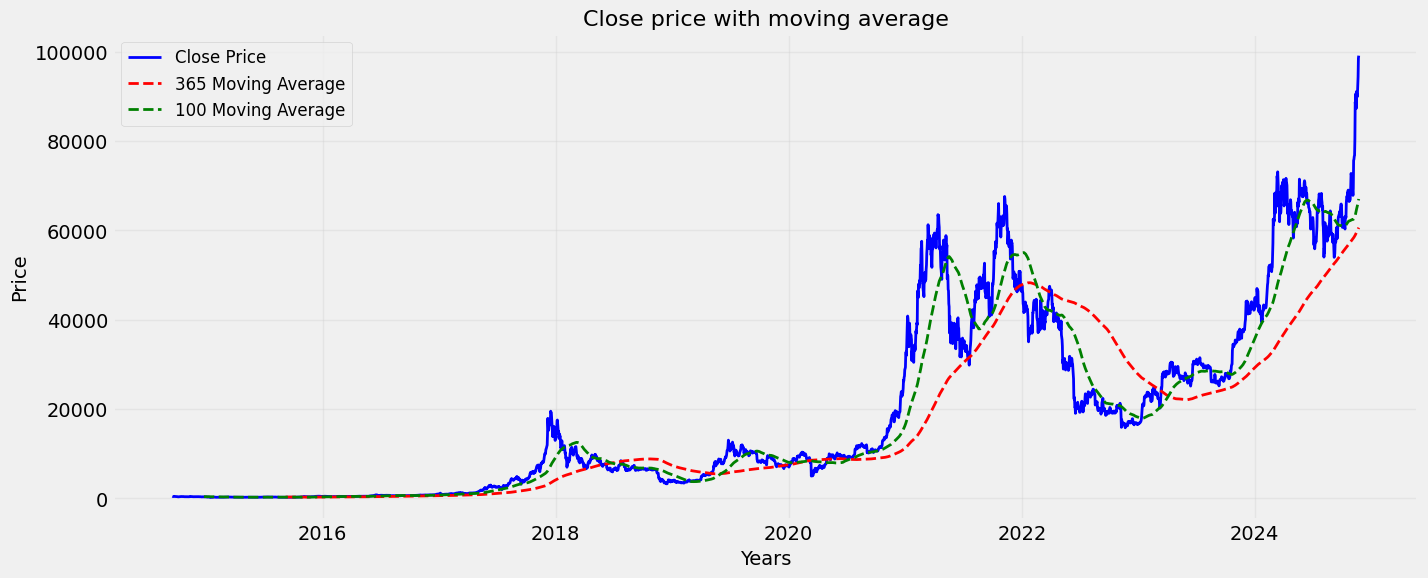

In [17]:
# Float closing price with enhancement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Moving Average', color = 'red', linestyle="--", linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Moving Average', color = 'green', linestyle="--", linewidth=2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [18]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [20]:
scaled_data

array([[0.00282307],
       [0.0024905 ],
       [0.0021908 ],
       ...,
       [0.95198526],
       [0.99409639],
       [1.        ]])

In [21]:
len(scaled_data)

3720

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
# Prepare data for LSTM
x_data = []
y_data = []
base_days = 100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i - base_days: i])
    y_data.append(scaled_data[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [24]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [26]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\KIIT01\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_train, batch_size = 5, epochs = 40)

Epoch 1/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - loss: 1.0138e-04
Epoch 2/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 62s 96ms/step - loss: 8.4681e-05
Epoch 3/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - loss: 1.1651e-04
Epoch 4/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 62s 94ms/step - loss: 1.0340e-04
Epoch 5/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - loss: 9.0582e-05
Epoch 6/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - loss: 9.5366e-05
Epoch 7/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 62s 94ms/step - loss: 9.0663e-05
Epoch 8/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - loss: 1.0349e-04
Epoch 9/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 70s 107ms/step - loss: 8.0837e-05
Epoch 10/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 62s 95ms/step - loss: 8.7539e-05
Epoch 11/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 63s 97ms/step - loss: 8.7104e-05
Epoch 12/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - loss: 9.3791e-05
Epoch 13/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - loss: 9.3336e-05
Epoch 14/40
652/652 ━━━━━━━━━━━━━━━━━━━━ 63s

In [29]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step


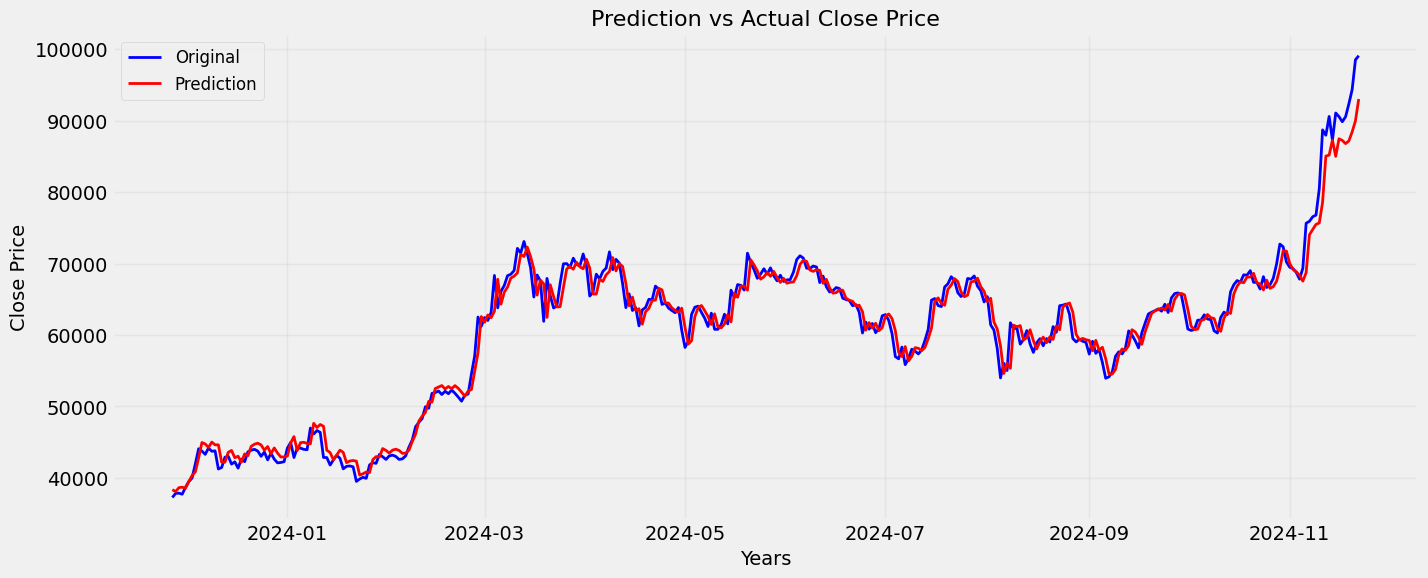

In [30]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red', linewidth=2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [31]:
# Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions = []
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [32]:
future_predictions

[array([[93821.91]], dtype=float32),
 array([[90520.65]], dtype=float32),
 array([[87787.6]], dtype=float32),
 array([[85279.375]], dtype=float32),
 array([[83009.84]], dtype=float32),
 array([[80966.34]], dtype=float32),
 array([[79131.88]], dtype=float32),
 array([[77489.1]], dtype=float32),
 array([[76021.086]], dtype=float32),
 array([[74711.7]], dtype=float32)]

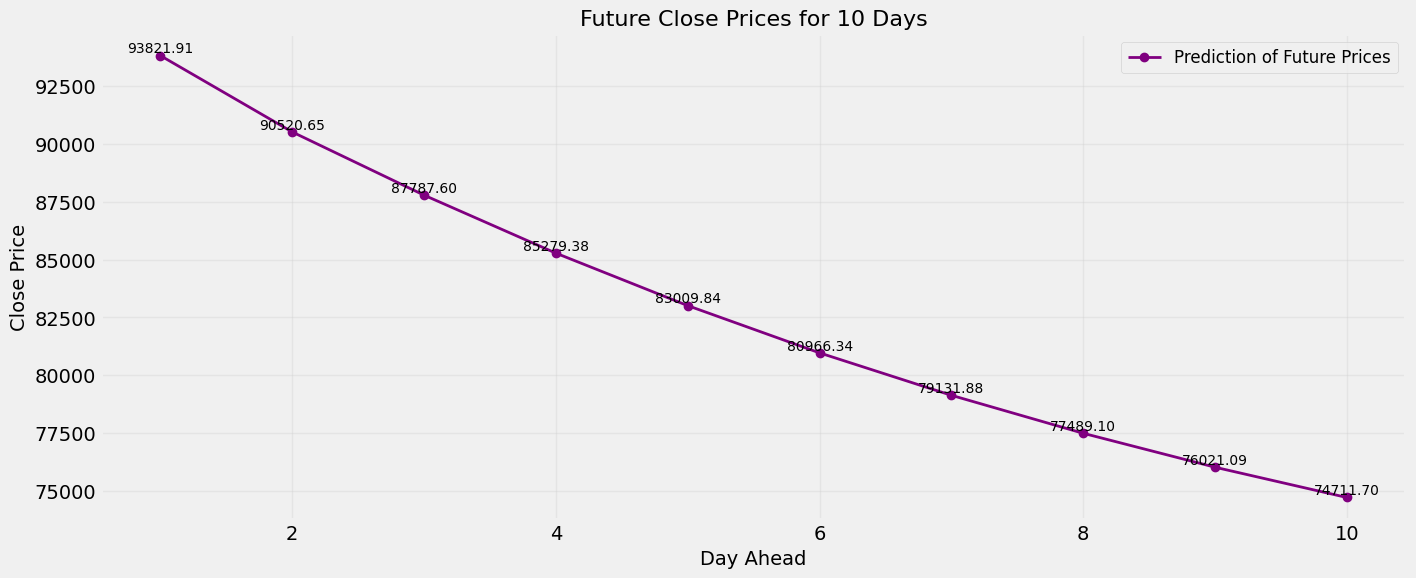

In [33]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker = "o", label = 'Prediction of Future Prices', color = 'purple', linewidth=2)

for i, val in enumerate(future_predictions):
    plt.text(i+1, val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [34]:
model.save("model.keras")